In [9]:
%matplotlib inline 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# define fit A mat
def designmatpoly(X, wtvector):
    X = X[:,0]
    A_traint = np.ones(X.shape)
    #print (len(wtvector), np.shape(A_traint))    
    
    for i in range(len(wtvector)-1):
        X_row = X**(i + 1)
        A_traint = np.vstack((A_traint, X_row))         
    A_train = A_traint.T
    #print (np.shape(A_train))
    return A_train

# regularisation gradient descent function
def reg_gradientdescent(w, X, y, l2, rate, n_iterations):
    wtseq = [w]
    for iteration in range(n_iterations):
        #print('iteration is:', iteration)
        gradients =  2/len(X) * X.T.dot(X.dot(w) - y) + 2 * l2 * w
        #print ('gradients',gradients)
        w = w - rate * gradients
    print ('final gradient',gradients)
    return w

# squared residuals
def squared_residual(x_test, y_test, wt):
    residual = 0
    x_test = x_test[:,0]
    
    for i in range(len(x_test)):
        y_predi = 0
        x_testi = x_test[i]
        for wti in range(len(wt)):
            y_predi += wt[wti]*np.power(x_testi, wti)
        residual += (y_test[i] - y_predi)**2   
    #print('residual is:************ ', residual)
    return residual

# predicted value
def predict(x, wt):    
    y_pred = []
    
    for i in range(len(x)):
        y_predi = 0
        x_i = x[i]
        for wti in range(len(wt)):
            y_predi += wt[wti]*np.power(x_i, wti)
#             print(wt[wti]*np.power(x_i, wti))
#             print('---------------------------------')
#         print('*************')
        y_pred.append(y_predi)
#   print('y_pred shape',np.shape(y_pred))
    return y_pred

In [11]:
# prepare data 
from sklearn.model_selection import train_test_split

def f(x):
    return np.sin(x)

points = 180
X = np.linspace(0, 2*np.pi,points)
y = f(X)+np.random.normal(0,0.05,points)  # np.sqrt(np.abs(X))*
X = np.atleast_2d(X).T


KFold(n_splits=10, random_state=None, shuffle=False)
final gradient [ 0.49975404  0.33542492  0.04899882 -0.25115626  0.07746067 -0.00648703]
residual is:  2.7582686701958608
final gradient [ 0.5481237   0.34902298  0.05114239 -0.25754262  0.07882624 -0.00656309]
residual is:  5.289843588492224
final gradient [ 0.5645219   0.37163241  0.06664038 -0.26633876  0.07959297 -0.00653683]
residual is:  5.074791510980437
final gradient [ 0.54797179  0.36303671  0.0694211  -0.25864132  0.07673677 -0.00627868]
residual is:  4.90233550206354
final gradient [ 0.5194692   0.33186988  0.0507088  -0.24423502  0.07439241 -0.00617403]
residual is:  5.201694877199359
final gradient [ 0.51415959  0.32002011  0.03463007 -0.24981144  0.07834674 -0.00659342]
residual is:  5.065834043234401
final gradient [ 0.52460265  0.32976255  0.03978083 -0.2549448   0.07912429 -0.00661315]
residual is:  5.241947567455514
final gradient [ 0.52551822  0.33160419  0.04287406 -0.2525715   0.07873566 -0.00663208]
residual is

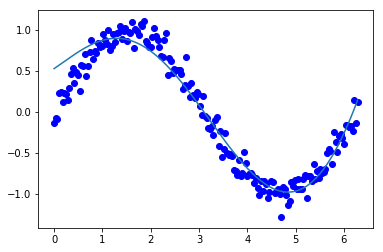

In [13]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)
kf.get_n_splits(X)
wtseq = []
residseq = []
print(kf)  
w0 = np.ones(6)  # polynomial degree

for train_index, test_index in kf.split(X):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    A_train = designmatpoly(X_train, w0)
    wtfin = reg_gradientdescent(w0, A_train, y_train, 0.5, rate = 0.00000001, n_iterations = 40000000) # take lamda = 1 here
    wtseq.append(wtfin)
    resid = squared_residual(X, y, wtfin)
    print('residual is: ', resid)
    residseq.append(resid)
    
plt.scatter(X, y, c='b')


wtseq = np.asarray(wtseq)
resid_min = np.min(residseq)
place = np.where(resid_min == np.min(residseq))
wtbest = wtseq[place]
print('wtbest is: ')
ypred = predict(X, wtbest.T)
# print('y predict is: ', ypred)
plt.plot(X, ypred)
print('best wt matix is: ',wtbest)